# 4장 신경망 학습 - 계속

## 미분

경사법에서는 현재 손실값의 기울기(경사도)를 이용해서 어느 방향으로 움직일지를 결정한다. 우선 학생때 배운 미분을 복습해보자.

In [2]:
import numpy as np
import matplotlib.pylab as plt

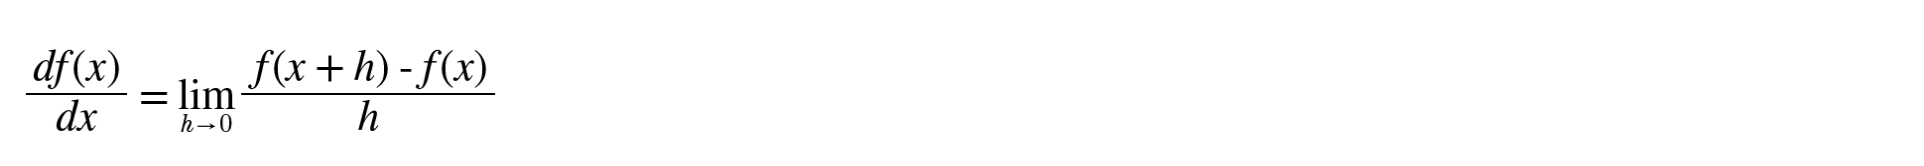

In [3]:
# 나쁜 구현 (수식을 그대로 구현)
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x))/h

print(np.float32(1e-50)) # 0 이 된다.

0.0


h값이 너무 작다. $10^{-4}$ 정도가 좋다고 알려져있다(고한다). 그리고, 오차를 줄이기 위해 전-후방의 차를 합치고 반으로 나누자.

위의 구현은 전방차분 (즉, 한쪽으로만 움직여봄) 이다. 전후방 다 해보는 것은 중앙 차분이라고 부른다.

In [4]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

예를 들어, 미분할 함수가 $y=0.01x^{2} + 0.1x$ 라고 해보자

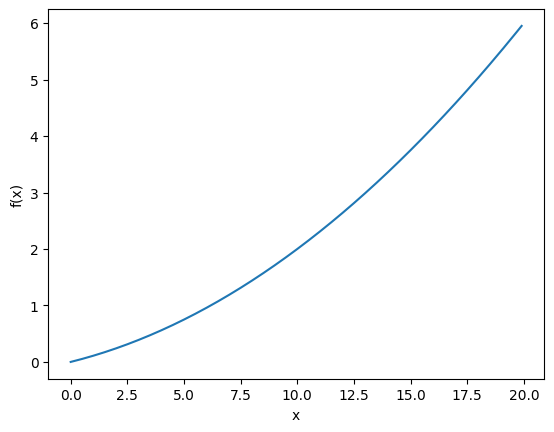

In [5]:
# 파이썬으로 만들면 이렇게 된다.
def funct_t(x):
    return 0.01*x**2 + 0.1*x

# 함 그려볼까.
x = np.arange(0.0, 20.0, 0.1)
y = funct_t(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

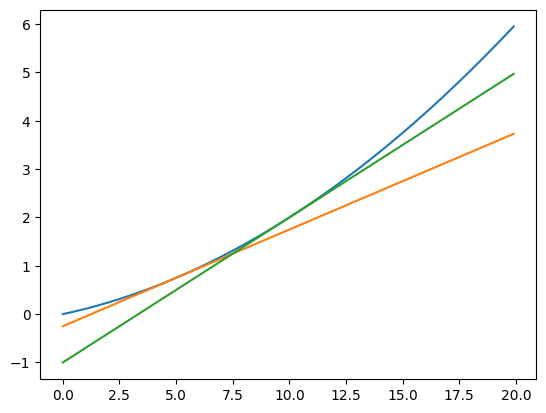

In [10]:
# 이건 접선 그려보는 함수
def tangent_line(f, x):
    # 이 함수도 멋있다.
    d = numerical_diff(f, x)    # 일단 주어진 x에서 기울기를 구한다.
    y = f(x) - d*x              # 0에서 y 값 (현재의 y 값에서 기울기*x 를 빼면 된다 !!!)
    return lambda x2: d*x2 + y  # 절편이 y이고 기울기가 d인 1차함수

plt.plot(x, y)
plt.plot(x, tangent_line(funct_t, 5)(x))
plt.plot(x, tangent_line(funct_t, 10)(x))
plt.show()

## 편미분, 기울기

$f(x_0, x_1) = x_0^{2} + x_1^{2}$ 의 그래프
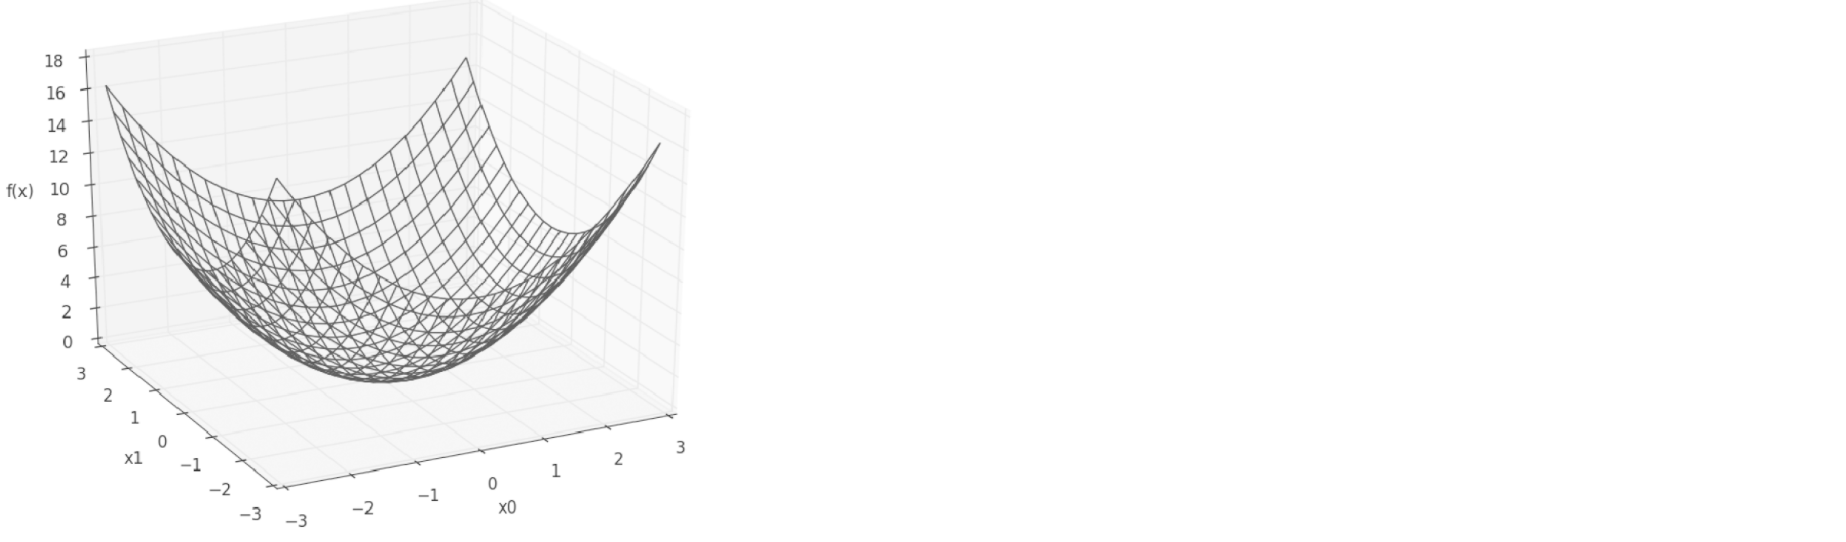

편미분은 변수가 여러개일때 변수 하나를 대상으로 미분하는 것. 나머지 변수들은 상수로 고정시킨다.

In [11]:
def func_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)      # 크기가 같은 배열 생성
    
    for idx in range(x.size):    # 나머지 요소들은 주어진 값을 그대로 사용, 한개씩만 미분한다.
        tmp = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp
    return grad

print(numerical_gradient(func_2, np.array([3.0, 4.0])))
print(numerical_gradient(func_2, np.array([0.0, 2.0])))

[6. 8.]
[0. 4.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


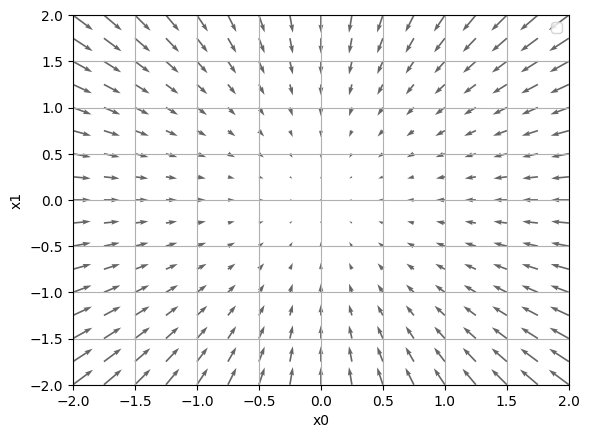

In [13]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
def numerical_gradient_batch(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient(f, x)
        
        return grad
    
# 여기부터는 matplot 초식.    
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient_batch(function_2, np.array([X, Y]))

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666") #,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

위 그림이 바로 $f(x_0, x_1) = x_0^{2} + x_1^{2}$ 의 기울기가 된다.

기울기에 마이너스를 붙여서 평면상에 벡터로 그려보면 한곳을 향하고 있다. 저쪽으로 가야 최솟값이 된다. 최솟값에서 멀수록 길이는 길어진다. **저쪽으로 가야한다.**